In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Problem 1

Man kan sige at distribution af et enkelt kast af den 8 kantede terning er $1/8$ for hver værdi i $[1, 8]$.
Ved at summe dem sammen kommer de til at ligne en gaussian random variable.

Man ved også de to limits for distributionen, nemlig $[50 \cdot 1, 50 \cdot 8]$, og hver imellem må mean ligge.
Ud fra intervallet og mean kan man regne varience.

In [10]:
# Man kan først finde størrelsen af intervallet, eller var * 2
var2 = 50 * 8 - 50 * 1
sigma2 = var2/2
mean = 50 * 1 + sigma2

# Ved coin flip får man egentlig det samme distribution

In [ ]:
# Part A


<BarContainer object of 500 artists>

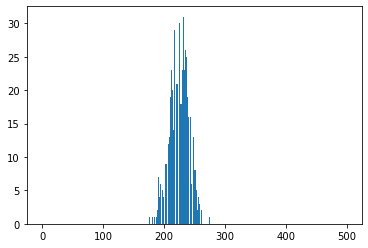

In [8]:
slots = np.zeros(500)
x = np.arange(500)
for exp in range(1000):
    s = 0
    for i in range(50):
        r = np.random.randint(1, 9)
        #r = [1, 8][np.random.randint(0, 2)]
        s += r
    slots[s] += 1

plt.bar(x, slots)

# Problem 2

The distribution function is given by:
$$
f(x)_\theta = \frac x {\theta^2} e ^ {- \frac x \theta }
$$

Then we can find the likelyhood function $f(x_1,...,x_n | \theta)$.

$$
f(x_1,...,x_n | \theta) = f(x_1)_\theta \cdot ... \cdot f(x_n)_\theta = \frac {\prod_i x_i} {\theta^{2n}} \cdot \exp \left( -\frac {\sum_i} \theta \right)
$$

Her kan man tage log på hver side

$$
\log f(x_1,...,x_n | \theta) = \log \left( \frac {\prod_i x_i} {\theta^{2n}} \right) - \frac 1 \theta \sum_i x_i
$$

Og diff i forhold til $\theta$.

$$
\frac d {d\theta} \log f(x_1,...,x_n | \theta) = -\frac {2n} \theta + \frac 1 {\theta^2} \sum_i x_i
$$

Og man kan løse for $0$.

$$
\theta = \frac {\sum_i x_i} {2n}
$$


In [34]:
# Part B
# Her indsættes samples

samples = np.array([3.2, 1.4, 6.5, 2.2, 1.8, 2.6, 3.9, 0.5, 1.2])
N = len(samples)

sum_samples = np.sum(samples)

theta_est = sum_samples / (2 * N)
print(f"Estimated theta = {theta_est}")

Estimated theta = 1.2944444444444445


argmax: 1.2962962962962963


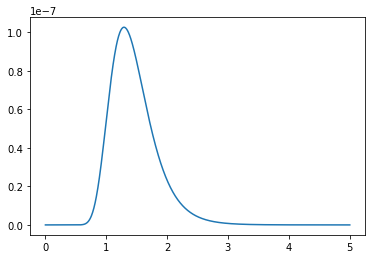

In [39]:
# Prøver lige at løse den programmerbart også
thetas = np.linspace(0, 5, 1000)[1:]
res = np.empty(thetas.shape)

for i, theta in enumerate(thetas):
    f = lambda x: ((x / (theta**2)) * np.exp(-x / theta))
    score = 1
    for sample in samples:
        score *= f(sample)
    
    res[i] = score

maxtheta = thetas[np.argmax(res)]
print(f"argmax: {maxtheta}")
plt.plot(thetas, res)

# Problem 3



In [60]:
radial = np.array([5.2, 5.7, 7.6, 8.0, 7.7, 5.5, 6.7, 7.0, 8.4, 5.9])

belted = np.array([5.1, 5.9, 7.2, 7.9, 7.8, 5.4, 6.7, 6.8, 7.9, 5.7])
belted_mean = np.mean(belted)
N = len(belted)

### Part A

Here we don't know the varience, and will therefore have to use the t distribution method.
The interval is given by:
$$
\bar X \pm t_{\alpha/2,n-1} \frac S {\sqrt{n}}
$$


In [59]:
alpha = 0.1
# Lets start by calculating the t value
tval = stats.t.ppf(1 - alpha, N-1)

S = np.sqrt(np.sum((belted - belted_mean)**2) / (N - 1))

diff = tval * S / np.sqrt(N)
print(f"Then the interval becomes [{belted_mean - diff}, {belted_mean + diff}]")

Then the interval becomes [6.174311863003706, 7.105688136996291]


### Part B

We can take the difference of the two and say that this should be less than or equal to $0$.
Thus the $H_0$ is $(\mu_{belted} - \mu_{radial}) \leq 0$.


In [79]:
mu_0 = 0
alpha = 0.05
diff = radial - belted
diff_mean = np.mean(diff)
print(diff, diff_mean)

S = np.sqrt(np.sum((diff - diff_mean)**2) / (N - 1))

ts = np.sqrt(N) * (diff_mean - mu_0) / S
print(f"ts: {ts}")
p_value = 1 - stats.t.cdf(ts, N - 1)
print(f"p-value: {p_value}")

if p_value > alpha:
    print("H_0 is rejected thus radial tires have better economy")
else:
    print("H_0 is accepted, thus radial does not make it better")

[ 0.1 -0.2  0.4  0.1 -0.1  0.1  0.   0.2  0.5  0.2] 0.12999999999999998
ts: 1.9475670608117976
p-value: 0.04164574347828587
H_0 is accepted, thus radial does not make it better


### Part C

Drivers can drive radically different in the way they brake, shift gears and apply power.
The driver is therefore as important a parameter as the car driven.

When creating such tests it is very important to only change the variable in question, in this case the tires.
By keeping all other variables the same, one can say that a change in performance likely comes from the other tires.